In [21]:
import os

import numpy as np
import pandas as pd
from typing import List
import seaborn as sns

os.chdir('/home/stachu/Projects/Anomaly_detection/TSAD')
sns.set_theme()

In [22]:
def cm_to_fbeta(cm: List[List[int]], beta: float = 1.0):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    numerator = (1 + beta**2) * tp
    denominator = (1 + beta**2) * tp + beta**2 * fn + fp
    f_beta_score = numerator/denominator
    return f_beta_score

In [23]:
df = pd.read_json('./fit_detector.json')

In [24]:
at_df = df[(df['train_date'] == '2022-06-02_23:04:26') & (df['model'] == 'AnomalyTransformer')]

In [26]:
fscores = at_df['scores'].apply(lambda scores: (
    scores['F_0.5_score'],
    cm_to_fbeta(scores['cm'], beta=1)
))
f05_macro, f1_binary = zip(*fscores)

In [27]:
np.mean(f05_macro), np.mean(f1_binary)

(0.9901851894799588, 0.9751811593234814)

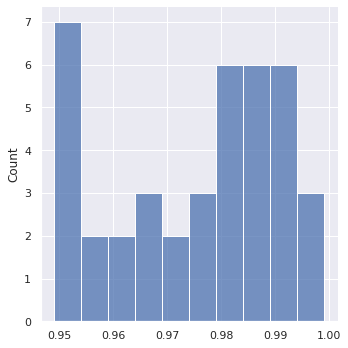

In [28]:
sns.displot(x=f1_binary, binwidth=0.005);

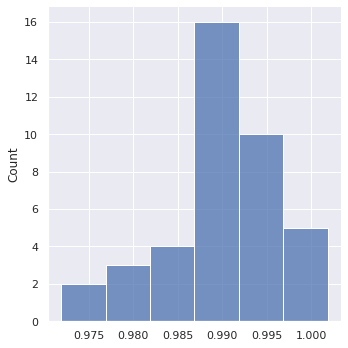

In [29]:
sns.displot(x=f05_macro, binwidth=0.005);